# Neural networks: Multi Layer Perceptron
## In this lab we will learn about Multi-layer Perceptrons



In [74]:
import numpy as np
import seaborn as sns
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt


# From sklearn we will use the implementations of the Multi-layer perceptron
from sklearn import cluster
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import binarize
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score, mean_squared_error
from keras.datasets import mnist, fashion_mnist


# We will also use different metrics
from sklearn import metrics





from IPython.display import display
from IPython.display import Image

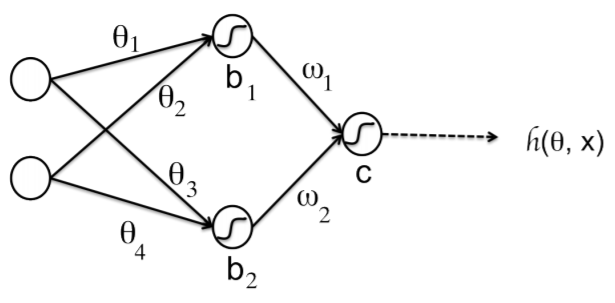

In [39]:
i = Image(filename='images/MLP_Networks_Parameters.png')
i

The multilayer perceptron is a neural network that may have one or more hidden layers composed of perceptrons. It has a number of particular characteristics:

1) It is used for Supervised Machine Learning (regression and classification).

2) Differently to the Perceptron model, it can approximate non-linear functions.

3) It can simultaneously approximate multiple target variables. 

Each of the nodes in the graph are known as neurons, to mantain the parallelism with the neural network denomination. However, they are nothing but perceptrons located one besides the other, or in sequential order.

We will use the multi-layer Perceptron for classification and regression. For classification, we will use the fashion_mnist dataset. sklearn has one classifier that consists of a common MLP; MLPClassifier. It can be used as any other classifier seen in the subject so far.

We read the fashion dataset and select training and test sets. 

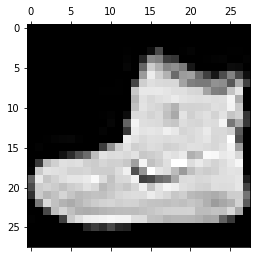

In [40]:
(X_fashion, y_fashion), (X_test, y_test) = fashion_mnist.load_data()
X_fashion = np.reshape(X_fashion, (-1, 784))
X_test = np.reshape(X_test, (-1, 784))

X_fashion = X_fashion/255.  # Normalize the data
X_fashion = X_fashion[:10000]  # Select a subset of the data for lighter training
plt.matshow(X_fashion[0].reshape(28,28), cmap=plt.cm.gray,)
plt.show()

In [41]:
nsamples = 1200
X_fashion_train, y_fashion_train = X_fashion[:nsamples], y_fashion[:nsamples]
X_fashion_test, y_fashion_test = X_test[:nsamples], y_test[:nsamples]
fashion_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

print(X_fashion_train.shape, y_fashion_train.shape)

(1200, 784) (1200,)


A multi-layer perceptron classifier is defined. It has only one hidden layer of 50 neurons. 

In [42]:
 mpl_clf = MLPClassifier(hidden_layer_sizes=(50), random_state=1)

We train the model (learn the weights)

In [43]:
 mpl_clf.fit(X_fashion_train,y_fashion_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=50, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

## Exercise 1

Determine how many parameters has learned this multi-layer perceptron network.

Try to figure the solution out before running the following cell, which contains the solution.

In [44]:
print(mpl_clf.coefs_[0].shape)  # First weight layer (mapping from input to first hidden layer)
print(mpl_clf.intercepts_[0].shape)  # Bias component added in the first hidden layer
print(mpl_clf.coefs_)

(784, 50)
(50,)
[array([[ -9.31261416e-20,  -3.24102299e-16,  -7.49672853e-10, ...,
          5.56979479e-17,   1.37562112e-16,  -5.04703318e-12],
       [ -1.27346153e-01,  -1.21566765e-01,  -2.08811316e-01, ...,
          1.46155380e-01,   7.40854113e-02,   4.60981348e-02],
       [ -1.15353884e-01,  -1.78797688e-01,  -1.47147510e-01, ...,
          2.09096122e-01,   1.93956817e-01,  -6.42374251e-04],
       ..., 
       [  7.68419532e-02,   6.03925974e-02,   5.73982182e-02, ...,
         -8.36409697e-02,  -4.47773183e-02,   9.34926070e-02],
       [  5.32198467e-02,   8.28981144e-02,  -1.33933990e-01, ...,
         -3.25085488e-02,  -6.80449811e-02,   6.51833078e-02],
       [ -9.55399126e-02,  -1.86618075e-01,  -2.32936245e-01, ...,
          2.39013763e-01,   1.40880193e-01,   1.02453926e-01]]), array([[-0.2534949 ,  0.29758255, -0.29511733,  0.37177546,  0.01393662,
         0.02474202, -0.63643155,  0.2560459 ,  0.1761262 , -0.05386148],
       [-0.56661471,  0.52145659, -0.6141

The model is used to compute the predictions on the test data. 

In [8]:
mpl_fashion_prediction = mpl_clf.predict(X_fashion_test)

The confusion matrix is computed.

In [9]:
metrics.confusion_matrix(y_fashion_test, mpl_fashion_prediction, labels=range(10), sample_weight=None)

array([[ 89,   3,   4,   5,   2,   0,  15,   0,   1,   0],
       [  0, 116,   0,   5,   1,   0,   0,   0,   0,   0],
       [  2,   0,  93,   1,  22,   0,  10,   0,   0,   0],
       [  6,   6,   2,  87,   4,   0,   3,   0,   2,   0],
       [  0,   0,  14,   6, 109,   0,  11,   0,   1,   0],
       [  0,   0,   0,   0,   0,  83,   0,  12,   1,  15],
       [ 15,   0,  17,   5,  20,   0,  66,   0,   1,   0],
       [  0,   0,   0,   0,   0,   2,   0, 102,   1,  12],
       [  0,   1,   1,   0,   2,   0,   5,   0, 104,   1],
       [  0,   0,   0,   0,   0,   0,   0,   6,   0, 108]])

## Exercise 2

In this exercise, we are tackling the common problem of clasifying hand-written digits. We are simplifying this exercise to modeling whether the number is larger or smaller than 5, so that we have a binary classification problem.

- Implement a MLP classifier that classifies hand-written digits as higher than five or lower than five. It should have 2 hidden layers and 100 neurons in each layer.


In the following cell, see  how the data containing the hand-written digits is loaded, and treated, so that we can use it with a regular MLP.


In [32]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(y_train)
y_train_binary = np.array([1 if x > 4 else 0 for x in y_train])
print(y_train_binary)
print(y_test)
y_test_binary = np.array([1 if x > 4 else 0 for x in y_test])
print(y_test_binary)

print(X_train.shape, y_test.shape)

X_train = np.reshape(X_train, (60000, 28*28))  # What are these two lines doing?
X_test = np.reshape(X_test, (10000, 28*28))
train_n_samples = 60000

print(X_train.shape, y_test.shape)

[5 0 4 ..., 5 6 8]
[1 0 0 ..., 1 1 1]
[7 2 1 ..., 4 5 6]
[1 0 0 ..., 0 1 1]
(60000, 28, 28) (10000,)
(60000, 784) (10000,)


In [36]:

n_len = 1000
X_train, y_train = X_train[:n_len], y_train_binary[:n_len]
X_test, y_test = X_test[:n_len], y_test[:n_len]

#y_train = y_train.reshape((len(y_train), 1))
print(X_train.shape, y_train.shape)


(1000, 784) (1000,)


In [37]:
 mpl_clf = MLPClassifier(hidden_layer_sizes=(100, 100), random_state=1)
 mpl_clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

## Exercise 3

A common approach to understand how a neural network works is to visualize the coefficients generated while training, so that it can be seen what areas of the data are more relevant to the classifier. 

- Use the  visualize_coefs function given below to graphically show the coefficients of the first hidden layer. - 

- Interpret that result. 



In [45]:
def visualize_coefs(coefs):
    """
    clf must be the instanced (and trained) classifier
    """
    fig, axes = plt.subplots(5, 10)
    # use global min / max to ensure all weights are shown on the same scale
    for coef, ax in zip(coefs.T, axes.ravel()):
        ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmax=np.max(coefs), vmin=np.min(coefs))
        ax.set_xticks(())
        ax.set_yticks(())

    plt.show()

A multi-layer perceptron classifier is defined. It has only one hidden layer of 50 neurons. 

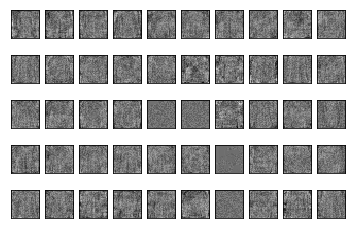

In [47]:
visualize_coefs(mpl_clf.coefs_[0])

As previously mentioned, the multi-layer perceptron can be also used for regression. The network architecture is the same except that the last activation functions are identity functions (they output continuous values instead of 0,1, or probabilities). 

To test multi-layer regressor we will use the "Appliances energy prediction Data Set" from the UCI database: https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

This dataset contains data about the electricity consumption of a house during a long time period. Environmental variables are measured in all the rooms of the house. Our goal will be to predict the energy used by the Appliances, and the energy use of light fixtures. Therefore, we want to simultaneously learn to predict two variables. For this purpose we will use a multi-layer regression model.

We read the dataset.

In [69]:
# Stores the data as a dataframe of Pandas
df = pd.read_csv('energydata_complete_cleaned.csv',sep=',')
#print(df)

## Exercise 4


Create a Multi-layer Regressor model for predicting the "Appliances" and "lights" variables. The neural network should have 2 hidden layers, the first of 50 neurons, and the second of 20.

Use the mean squared error to compute the quality of the prediction.
Suggestions. See:

http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

and consult the Pandas library help if required for extracting a subsect of columns from the matrix.

In [70]:
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4    ...             T9   RH_9     T_out  \
0  19.79  44.730000  19.000000    ...      17.033333  45.53  6.600000   
1  19.79  44.790000  19.000000    ...      17.066667  45.56  6.483333   
2  19.79  44.933333  18.926667    ...      17.000000  45.50  6.366667   
3  19.79  45.000000  18.890000    ...      17.000000  45.40  6.250000   
4  19.79  45.000000  18.890000    ...      17.000000  45.40  6.133333   

   Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0        733.5    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1        733.6    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2        733.7    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3        733.8    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4        733.9    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [85]:
from sklearn.model_selection import train_test_split


values = df.values
X = values[:, 3:]
y = values[:, 1:3]
print(X.shape, y.shape)

len_ = 2500
X, y = X[:len_], y[:len_]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

print()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(19735, 26) (19735, 2)

(1675, 26) (1675, 2)
(825, 26) (825, 2)


In [88]:
from sklearn.neural_network import MLPRegressor



mlpr = MLPRegressor(hidden_layer_sizes=(50, 20), random_state=1)
mlpr.fit(X_train, y_train)

preds = mlpr.predict(X_test)
ans = mean_squared_error(preds, y_test)
print(ans)

n_samples = 5


# Hoy am I supposed to plot this?!
print(X_test[0])
print(y_test[:n_samples])
print(preds[:n_samples])


7669.04194886
[17.856666666666698 37.76 17.1666666666667 36.7 18.1 38.79
 17.823333333333302 37.03 16.29 43.6744444444444 -0.8 94.9233333333333
 15.885 31.177777777777802 18.1 39.8066666666667 15.63 36.3266666666667 1.4
 764.5 72.6666666666667 1.0 48.3333333333333 -3.06666666666667
 24.720405659172684 24.720405659172684]
[[50 20]
 [90 10]
 [80 0]
 [40 0]
 [90 10]]
[[ 94.65706847   4.82040635]
 [ 90.67817839   1.65879754]
 [ 95.86696691   6.01157405]
 [ 97.3247355    6.09802189]
 [ 94.78464062   6.13796046]]


## Exercise 5

Now that we know how to create a MLP the easy way, we are going to give one step further, and design a MLP using tensorflow from scratch.

1) Using the same technique used in the tensorflow notebook, design a MLP using tensorflow. Following the notation used in the previous notebook to formalize the linear models (y = W\*X + b), a one-hidden-layer MLP can be defined as y = (W1\*X + b1)\*W2 + b2. The rest of the tensorflow components (loss function, optimizer, ...) need no changes to work with this model. The MLP will have one single hidden layer, of 100 neurons.

2) Use the designed MLP to learn a **classifier** for the MNIST dataset that was used in the example.

3) Use the visualize_coefs function to visualize the weights learned for some of the neurons in the first layer. You can also modify the function to visualize all of them.

4) Along with the error, display the accuracy of the model while training it.

In [ ]:
tf.reset_default_graph()
mini_batch_size = 100

# It's a good practice to specify the shape of the placeholders

X = tf.placeholder("float", shape=___, name="X")
Y = tf.placeholder("float", shape=___, name="y")

W1 = tf.Variable(tf.random_normal(___), name="weight1")
b1 = tf.Variable(tf.random_normal(___), name="bias1")

# Declare the rest of variables

W2 = tf.Variable(tf.random_normal(___), name="weight2")
b2 = tf.Variable(tf.random_normal(___), name="bias2")

W3 = tf.Variable(tf.random_normal(___), name="weight3")
b3 = tf.Variable(tf.random_normal(___), name="bias3")

# Create the model

layer1 = 

layer2 = 

prediction = 

variable_list = [W1, W2, W3, b1, b2, b3]

loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=prediction, labels=Y))

learning_rate = 0.0001

adam = tf.train.AdamOptimizer(learning_rate)

optimizer = adam.minimize(loss)

init = tf.global_variables_initializer()

training_epochs = 35000
display_step = 1000
perm = np.random.permutation(train_n_samples)


n_batch = train_n_samples // mini_batch_size + (train_n_samples % mini_batch_size != 0)



In [ ]:
init = tf.global_variables_initializer()


with tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True)) as sess:

    sess.run(init)

    for epoch in range(training_epochs):
        i_batch = (epoch % n_batch)*mini_batch_size
        batch = X_train[i_batch:i_batch+mini_batch_size], y_train_binary[i_batch:i_batch+mini_batch_size]
        sess.run(optimizer, feed_dict={X: batch[0], Y: np.reshape(batch[1], (-1,1))})
        
        if (epoch+1) % display_step == 0:
            err, p = sess.run((loss, tf.nn.sigmoid(prediction)), feed_dict={X: batch[0],  Y: np.reshape(batch[1], (-1,1))})
            p = np.round(p)
            acc = 0  # Compute the accuracy
            
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(err), "Accuracy:", str(acc))

    training_loss = sess.run(loss, feed_dict={X: X_test, Y: np.reshape(y_test_binary, (-1,1))})
    acc = 0  # Compute the accuracy
    print("Training loss=", training_loss, '\n' + "Accuracy:", str(acc))
    
    weights1 = ___
    
    
    

In [ ]:
visualize_coefs(weights1)

# Exercise 6

Perform the necessary modifications to the model defined in Exercise 5, so that it becomes a MLP regressor. Test your model with the energy dataset used in Exercise 4.

You can check other regression examples used in previous labs (the linear regression, for example).

Up until this point, we have let tensorflow optimize our models (both the simple ones that we did in the last lab, and the more complex MLP in this one) without much knowledge about the numerical computations that the optimizer was doing. Now that we know more about the backpropagation error, we are going to dig deeper into tensorflow, and see what operations are being performed in each step of the model training.

To know how the values change in each learning iteration, we are going to divide the optimizing operation in two halves, gradient computing, and gradient application:

In [ ]:
grads = adam.compute_gradients(loss, var_list=variable_list)
application = adam.apply_gradients(grads)

In [ ]:
init = tf.global_variables_initializer()


with tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True)) as sess:

    sess.run(init)

    for epoch in range(training_epochs):
        i_batch = (epoch % n_batch)*mini_batch_size
        batch = X_train[i_batch:i_batch+mini_batch_size], y_train_binary[i_batch:i_batch+mini_batch_size]
        gs = sess.run(grads, feed_dict={X: batch[0], Y: np.reshape(batch[1], (-1,1))})
        
        sess.run(application, feed_dict={X: batch[0], Y: np.reshape(batch[1], (-1,1))})
        
        if (epoch+1) % display_step == 0:
            err, p = sess.run((loss, tf.nn.sigmoid(prediction)), feed_dict={X: batch[0],  Y: np.reshape(batch[1], (-1,1))})
            visualize_coefs(gs[0][0])
            
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(err))

    training_loss = sess.run(loss, feed_dict={X: X_test, Y: np.reshape(y_test_binary, (-1,1))})
    print("Training loss=", training_loss, '\n')

# Exercise 7

Impement a solution able to create an MLP model from a definition based on a small number of hyperparameters (specified as the function parameters). Use as few lines as possible (this is, using lists and loops).

In [ ]:
def createMLP(inp, h_layers, outp):
    """
    inp: An integer. This will be the size of the data input.
    h_layers: A list of integers. Each integer represents the number of neurons in a hidden layer. For example,
        h_layers = [40, 30, 50, 60] will result in an MLP with four hidden layers.
    outp: An integer. This will be the size of the predicted data.
    """
    
    # Define the necessary tensorflow variables for creating the model.
    weights = []
    biases = []
    
    # Define the model using the variables previously built.
    
    tf.reset_default_graph()
    
    return #output_layer

Use the createMLP function to create a tensorflow model for the Energy problem.

In [ ]:
model = createMLP(__, [20, 15, 10, 5], __)

# Exercise 8

Modify the model used for the binary version of MNIST so that it can distinguish between all 10 different digits. Take a look at the softmax and argmax functions of tensorflow. There are several tutorials online that you can use as guide.